**Practice task for Lesson 8**

Antonec Svetlana, Raines Evgenii

GSM3215435 dataset


In [1]:
# Install packages

!pip install matplotlib==3.1.3
!pip install --quiet scikit-learn
!pip install --quiet numpy
!pip install --quiet scanpy
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
!pip install louvain
!pip install leidenalg
!pip install scikit-learn
!pip install dask


     |████████████████████████████████| 13.1 MB 13.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 2.0 MB 12.9 MB/s 
     |████████████████████████████████| 88 kB 4.6 MB/s 
     |████████████████████████████████| 11.2 MB 47.7 MB/s 
     |████████████████████████████████| 96 kB 4.4 MB/s 
     |████████████████████████████████| 930 kB 57.5 MB/s 
     |████████████████████████████████| 1.1 MB 67.6 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155514 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Pr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  if sys.path[0] == '':


In [1]:
# Import packages
import louvain
import leidenalg
import sklearn
import dask
import libarchive
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  


In [29]:
# Import data

adata = sc.read_10x_mtx(
    '/content/data', 
    var_names='gene_symbols')  

In [28]:
!gzip data/features.tsv

In [30]:
# Basic filtering 

sc.pp.filter_cells(adata, min_genes=10)
sc.pp.filter_genes(adata, min_cells=10)

GENES: 
                           gene_ids    feature_types  n_cells
Mrpl15          ENSMUSG00000033845  Gene Expression     1349
Lypla1          ENSMUSG00000025903  Gene Expression     1181
Tcea1           ENSMUSG00000033813  Gene Expression     1863
Atp6v1h         ENSMUSG00000033793  Gene Expression     1329
Rb1cc1          ENSMUSG00000025907  Gene Expression      917
...                            ...              ...      ...
AC168977.2      ENSMUSG00000094915  Gene Expression       17
AC168977.1      ENSMUSG00000079808  Gene Expression       65
PISD            ENSMUSG00000095041  Gene Expression     2263
DHRSX           ENSMUSG00000063897  Gene Expression     1017
CAAA01147332.1  ENSMUSG00000095742  Gene Expression       39

[13105 rows x 3 columns] 

OBSERVATIONS: 
                     n_genes
AAACCTGAGATGCCTT-1     2218
AAACCTGAGCTAGTGG-1     1209
AAACCTGCAAGCTGTT-1     2084
AAACCTGCACCGAATT-1     1961
AAACCTGCACGCTTTC-1      908
AAACCTGCAGGACCCT-1     2985
AAACCTGGTCACAAGG-1 

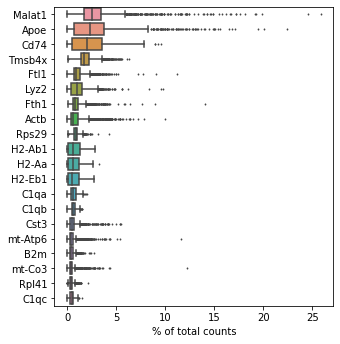

In [31]:
# Genes 

import matplotlib 
adata.obs.head(10)
print("GENES:", "\n", adata.var, "\n")
print("OBSERVATIONS:", "\n", adata.obs.head(10), "\n")

sc.pl.highest_expr_genes(adata, n_top=20, )

In [34]:
# Annotate the group of mitochondrial genes


adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
adata.var
print("Number of mitochondrial genes:", "\n", adata.var['mt'].value_counts())
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=True, inplace=True)

Number of mitochondrial genes: 
 False    13092
True        13
Name: mt, dtype: int64


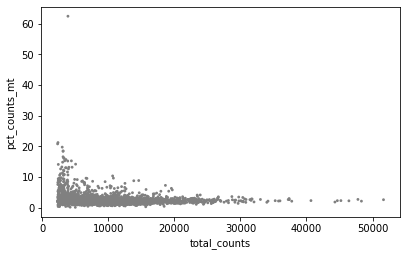

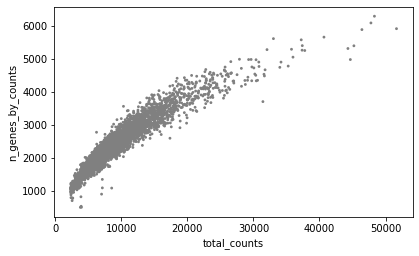

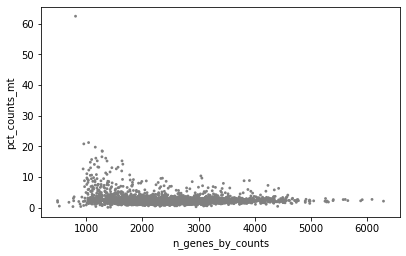

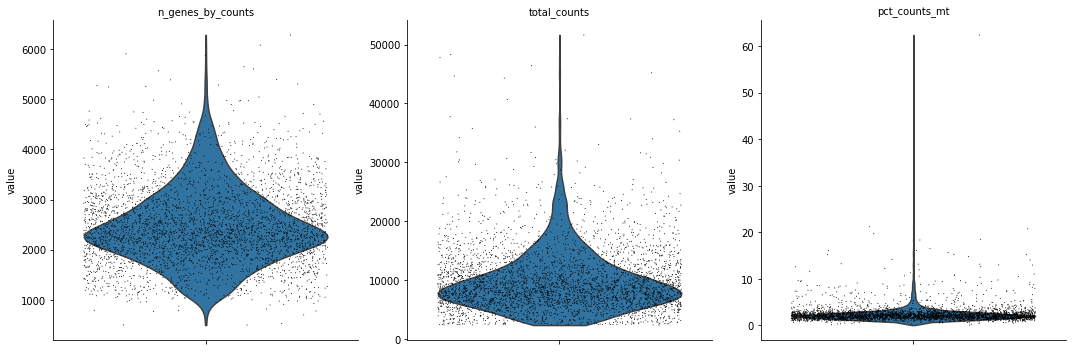

In [35]:
# Plots

sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
sc.pl.scatter(adata, x='n_genes_by_counts', y='pct_counts_mt')
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [36]:
# Filter

adata = adata[adata.obs.n_genes_by_counts > 1000, :].copy()
adata = adata[adata.obs.pct_counts_mt < 5, :].copy()

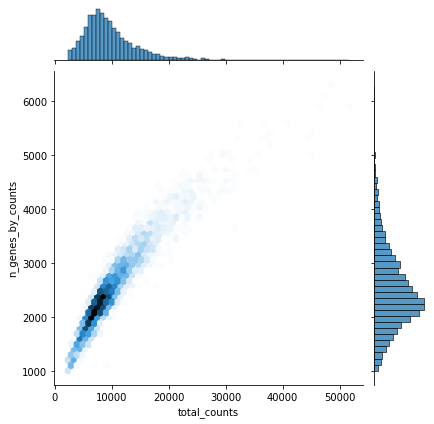

In [37]:
# Jointplot

import scanpy as sc
import seaborn as sns

sns.jointplot(
    data=adata.obs,
    x="total_counts",
    y="n_genes_by_counts",
    kind="hex",
)

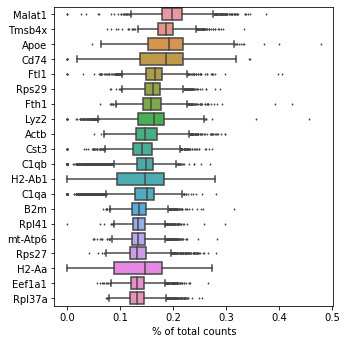

In [38]:
# Normalize

pd.DataFrame.sparse.from_spmatrix(adata.X[:100, :100])
sc.pp.normalize_total(adata, target_sum=1e4) 
sc.pp.log1p(adata)
pd.DataFrame.sparse.from_spmatrix(adata.X[:100, :100])
sc.pl.highest_expr_genes(adata, n_top=20, )

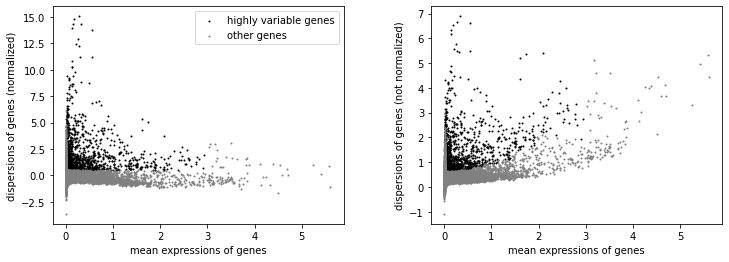

In [39]:
# Identification of highly variable features

import matplotlib.pyplot as plt
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
gca = sc.pl.highly_variable_genes(adata, show=False, log=False)

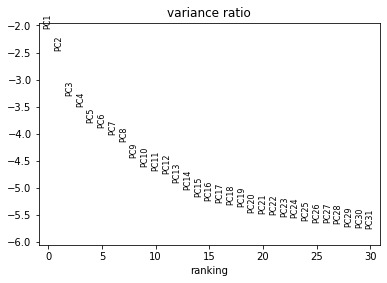

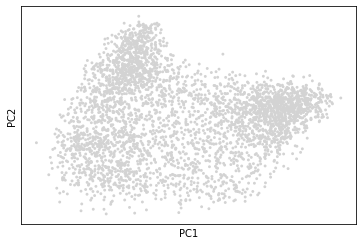

In [41]:
# PCA dimensionality reduction

sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)
sc.pl.pca(adata)

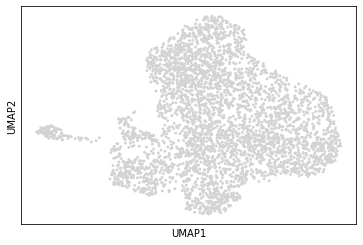

In [42]:
# Compute neghborhood graph and embedd it using UMAP

sc.pp.neighbors(adata, n_neighbors=30, n_pcs=10)
sc.tl.umap(adata)
sc.pl.umap(adata)

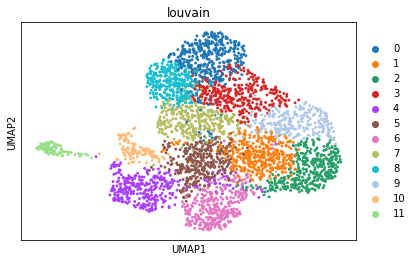

In [43]:
#  Cell clustering

sc.tl.louvain(adata, resolution=1.2)
sc.pl.umap(adata, color='louvain')

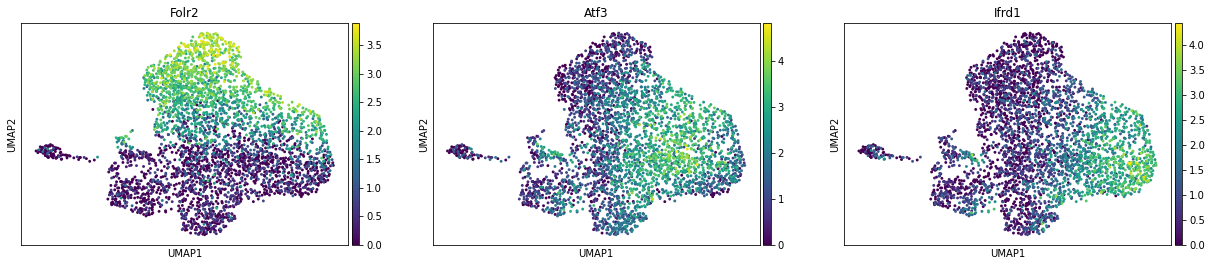

In [46]:
# Running DGE tests to find cluster biomarkers

sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(1)
sc.pl.umap(adata, color=["Folr2", "Atf3", "Ifrd1"])

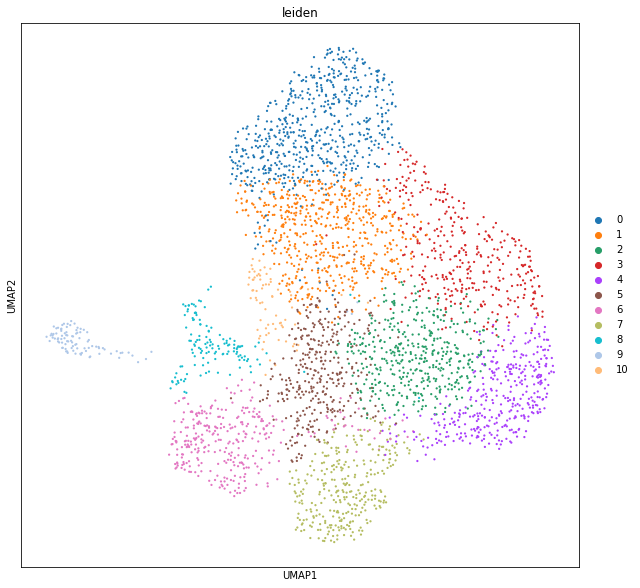

In [47]:
# Another clustering

from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (10, 10)}):
    sc.tl.leiden(adata, resolution=0.7)
    sc.pl.umap(adata, color='leiden', s=20)

In [49]:
# Extract embedding

adata.obsm
df = pd.DataFrame(adata.obsm['X_pca'])



In [50]:
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-9.782147,-4.836031,-2.377055,-1.583314,0.696351,-1.466231,-1.965507,-0.722408,0.908760,3.139494,...,0.583563,-0.560899,0.906958,-1.036729,-1.171195,-0.206673,-0.408988,0.740532,-0.453928,1.084192
1,-3.883418,9.840924,-7.323013,2.791461,-8.180953,0.044279,1.729870,7.658954,-0.498681,1.305792,...,-1.128360,0.548432,0.836149,0.648273,-0.301054,0.397769,-0.569397,-0.318107,-1.160867,0.184063
2,-5.497998,-7.979033,1.787935,1.133712,-3.293237,0.195706,2.291573,-3.449686,-0.066445,0.666961,...,-0.211319,0.829860,0.669394,0.511549,-1.045150,0.310171,-0.843846,-0.120248,-1.973280,0.477005
3,7.403188,-3.632700,-0.075779,0.592428,-1.471518,0.703673,-0.177621,-1.437364,0.704207,-0.749352,...,-0.861534,-0.701858,-1.431321,0.191238,-0.867634,0.889487,-0.949231,-0.140317,-0.808585,-0.714921
4,-0.775142,-5.962546,2.851030,0.697307,-3.285477,0.697993,0.554119,0.208530,2.080660,-1.125283,...,0.461042,-0.686425,0.020339,0.193830,-0.156686,-0.134606,2.738741,1.540706,-0.455039,0.151409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,-3.261320,1.473258,-1.521026,-6.030884,-0.790383,-1.847983,0.202445,-1.169319,-1.592080,-0.183030,...,0.942182,-1.086117,-1.622877,0.722648,-0.360421,0.328471,-1.302886,-0.486157,-0.902084,0.426559
3596,8.621775,1.267774,-1.201109,0.854694,1.110113,2.685121,1.056711,-0.608654,-0.267017,1.834246,...,-0.220766,-0.948385,0.875783,-0.010398,-1.212512,0.678167,-0.028720,0.121374,-0.758085,1.956313
3597,-6.141578,1.852354,-0.874831,-5.394356,-0.841500,-2.055579,-2.100286,-1.687952,-1.285084,1.639191,...,-0.210473,0.537462,0.714148,0.480077,0.651931,0.030232,0.264392,-0.775935,0.804242,-1.255127
3598,7.561377,-3.503078,-1.073419,-1.486035,0.243521,0.947941,0.936763,0.728678,1.959532,-2.485293,...,1.510543,0.312928,-0.229330,-0.684322,-0.842148,0.125006,-0.226234,0.205164,0.246737,-0.829922


In [51]:
adata.var

,gene_ids,feature_types,n_cells,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm
Mrpl15,ENSMUSG00000033845,Gene Expression,1349,False,1349,0.500661,0.405906,64.321608,1893.0,7.546446,False,0.395257,0.223236,-0.526567
Lypla1,ENSMUSG00000025903,Gene Expression,1181,False,1181,0.406771,0.341297,68.764877,1538.0,7.338888,False,0.339136,0.204230,-0.569039
Tcea1,ENSMUSG00000033813,Gene Expression,1863,False,1863,0.767786,0.569728,50.727321,2903.0,7.973845,False,0.583504,0.336409,-0.464863
Atp6v1h,ENSMUSG00000033793,Gene Expression,1329,False,1329,0.503570,0.407843,64.850569,1904.0,7.552238,False,0.394394,0.280214,-0.399242
Rb1cc1,ENSMUSG00000025907,Gene Expression,917,False,917,0.297011,0.260063,75.747157,1123.0,7.024649,False,0.281584,0.413350,-0.101732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC168977.2,ENSMUSG00000094915,Gene Expression,17,False,17,0.004496,0.004486,99.550383,17.0,2.890372,False,0.005444,0.316282,-0.247634
AC168977.1,ENSMUSG00000079808,Gene Expression,65,False,65,0.018514,0.018344,98.280878,70.0,4.262680,False,0.017813,0.206152,-0.513665
PISD,ENSMUSG00000095041,Gene Expression,2263,False,2263,1.182227,0.780346,40.148109,4470.0,8.405367,False,0.851111,0.826184,0.281692
DHRSX,ENSMUSG00000063897,Gene Expression,1017,False,1017,0.345147,0.296503,73.102354,1305.0,7.174724,False,0.293852,0.292426,-0.371952


In [52]:
adata.X

<3600x13105 sparse matrix of type '<class 'numpy.float32'>'
	with 9000732 stored elements in Compressed Sparse Row format>

In [53]:
adata.obs

,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,louvain,leiden
AAACCTGAGATGCCTT-1,2218,2216,7.703910,8159.0,9.006999,190.0,5.252274,2.328717,1,2
AAACCTGAGCTAGTGG-1,1209,1205,7.095064,3113.0,8.043663,108.0,4.691348,3.469322,11,9
AAACCTGCAAGCTGTT-1,2084,2083,7.642044,8289.0,9.022805,122.0,4.812184,1.471830,2,4
AAACCTGCACCGAATT-1,1961,1960,7.581210,5459.0,8.605204,93.0,4.543295,1.703609,3,1
AAACCTGCAGGACCCT-1,2985,2984,8.001355,11580.0,9.357121,234.0,5.459586,2.020725,9,3
...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGCGGCTTC-1,1667,1667,7.419381,5576.0,8.626407,107.0,4.682131,1.918938,5,5
TTTGTCAAGTCCTCCT-1,2732,2728,7.911691,9265.0,9.134107,106.0,4.672829,1.144091,7,0
TTTGTCACAGGCTCAC-1,2012,2011,7.606885,7086.0,8.866017,167.0,5.123964,2.356760,5,5
TTTGTCACATCACCCT-1,2922,2920,7.979681,11526.0,9.352448,237.0,5.472270,2.056221,3,1


In [54]:
adata.uns

OverloadedDict, wrapping:
	OrderedDict([('log1p', {'base': None}), ('hvg', {'flavor': 'seurat'}), ('pca', {'params': {'zero_center': True, 'use_highly_variable': True}, 'variance': array([33.81887   , 22.463184  ,  9.682956  ,  7.943465  ,  5.9331107 ,
        5.3929048 ,  4.732997  ,  4.180115  ,  3.0972674 ,  2.645796  ,
        2.434836  ,  2.3123205 ,  1.9493366 ,  1.7225717 ,  1.4995114 ,
        1.3901188 ,  1.3389965 ,  1.2889781 ,  1.2457492 ,  1.1281362 ,
        1.0970689 ,  1.0757223 ,  1.040399  ,  1.0275619 ,  0.9704459 ,
        0.93012184,  0.9274608 ,  0.9072403 ,  0.87116784,  0.8422031 ,
        0.82703316,  0.80566156,  0.7836664 ,  0.7687371 ,  0.7656075 ,
        0.73985416,  0.7288782 ,  0.71703494,  0.70071536,  0.6858807 ,
        0.67587817,  0.66981876,  0.6603773 ,  0.6503597 ,  0.6386869 ,
        0.6296197 ,  0.6272783 ,  0.62186813,  0.6110585 ,  0.60124254],
      dtype=float32), 'variance_ratio': array([0.12777768, 0.08487254, 0.03658507, 0.03001276, 0.0